In [1]:
# 다중 선형 회귀 : x1, x2, x3
# 단순 선형 회귀 : x=> y hat

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x=[2,4,6,8] #공부시간
y=[81,93,91,97] #점수

mx = np.mean(x) #5
my = np.mean(y) #90.5

# y=ax+b 
# a는 직선의 기울기. = y값의 증가량 / x값의 증가량

print(x)
print([(mx-i)**2 for i in x]) # 분모
divisor = sum([(mx-i)**2 for i in x])

[2, 4, 6, 8]
[9.0, 1.0, 1.0, 9.0]


In [4]:
#기울기 공식의 분자
def top(x, mx, y, my):
    res=0
    for i in range(len(x)):
        res+=(x[i] - mx)*(y[i]-my)

    return res

In [5]:
divide=top(x,mx,y,my)
print(divide)

a=divide/divisor # 기울기
b=my-(mx*a)

print(a)
print(b)

46.0
2.3
79.0


In [6]:
# x data, y data
# [공부시간, 점수]
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data] # i에 요소 하나씩 불러옴
y = [i[1] for i in data]

print(x, y)

# 최초의 가설함수(랜덤하게) 정의 : y=3x+76


[2, 4, 6, 8] [81, 93, 91, 97]


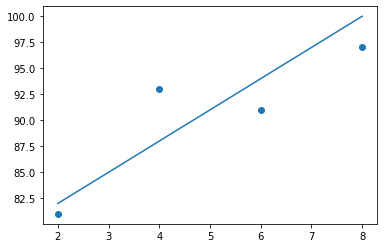

In [7]:
h_0 = [3*d[0] + 76 for d in data]
plt.scatter(x,y)
plt.plot(x, h_0)
plt.show()

In [8]:
# y=ax+b 에서 a,b값 대입하여 결과를 출력하는 함수
def predict(x):
    return 3*x + 76 # 예측값

# 정답 2.3x + 76
def mse(y, yhat):
    return ((y-yhat)**2).mean()

# x값을 입력하여 prediction
predict_result = [predict(x[i]) for i in range(len(x))]
print(predict_result)

# MSE 출력
mse(np.array(y), np.array(predict_result))
    

[82, 88, 94, 100]


11.0

In [9]:
# 알파(학습률)는 얼만큼 이동할지 결정 (0.01 ~ 0.001)

xdata=np.array(x)
ydata=np.array(y)

a=0 #기울기
b=0 #y절편 
# 가설함수 = ax+b

# 학습률
lr=0.03

# a=a-lr* (cost함수)a미분

# 전체 데이터(4건) 1번 반복 학습 : 1 epoch(에폭)
# 전체 데이터(4건) 2000번 반복 학습 : 2000 epoch(에폭)
epochs=2001

#경사하강법
for i in range(epochs):
    yhat=a*xdata+b #예측값
    error=ydata-yhat #오차 = 실제값 - 예측값
    adiff= -(2/len(xdata)) * sum(xdata*error)   #오차함수를 a로 미분
    bdiff= -(2/len(xdata)) * sum(error)   #오차함수를 b로 미분
    a = a - lr * adiff#오차함수를 a로 미분한 값에 학습률을 곱해서 a를 업데이트
    b = b - lr * bdiff#오차함수를 b로 미분한 값에 학습률을 곱해서 b를 업데이트
    if i%100 == 0:
        print("기울기=%.4f, 절편=%.4f, 오차=%.4f" % (a,b, sum(error)))

# epoches=2001, lr=0.01 기울기=2.3193, 절편=78.8850, 오차=0.0749
# epoches=2001, lr=0.03 기울기=2.3000, 절편=79.0000, 오차=0.0000


기울기=27.8400, 절편=5.4300, 오차=362.0000
기울기=7.0739, 절편=50.5117, 오차=18.6577
기울기=4.0960, 절편=68.2822, 오차=7.0193
기울기=2.9757, 절편=74.9678, 오차=2.6408
기울기=2.5542, 절편=77.4830, 오차=0.9935
기울기=2.3956, 절편=78.4293, 오차=0.3738
기울기=2.3360, 절편=78.7853, 오차=0.1406
기울기=2.3135, 절편=78.9192, 오차=0.0529
기울기=2.3051, 절편=78.9696, 오차=0.0199
기울기=2.3019, 절편=78.9886, 오차=0.0075
기울기=2.3007, 절편=78.9957, 오차=0.0028
기울기=2.3003, 절편=78.9984, 오차=0.0011
기울기=2.3001, 절편=78.9994, 오차=0.0004
기울기=2.3000, 절편=78.9998, 오차=0.0002
기울기=2.3000, 절편=78.9999, 오차=0.0001
기울기=2.3000, 절편=79.0000, 오차=0.0000
기울기=2.3000, 절편=79.0000, 오차=0.0000
기울기=2.3000, 절편=79.0000, 오차=0.0000
기울기=2.3000, 절편=79.0000, 오차=0.0000
기울기=2.3000, 절편=79.0000, 오차=0.0000
기울기=2.3000, 절편=79.0000, 오차=0.0000


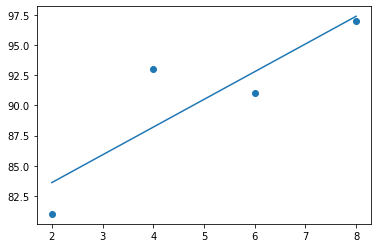

In [10]:
ypred = a *xdata + b #우리 모델의 예측값
plt.scatter(x,y)
plt.plot([min(xdata),max(xdata)], [min(ypred), max(ypred)])

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


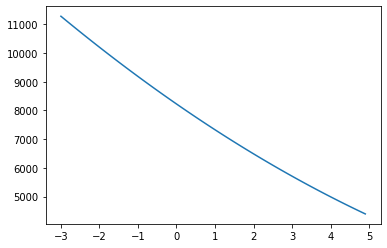

In [12]:
# 텐서플로 라이브러리를 이용한 모델링
X = [2, 4, 6, 8]
Y = [81, 93, 91, 97]

W = tf.placeholder(tf.float32)

hypothesis = X * W # 가설함수, b는 무시

cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30, 50): # i : -30~49까지
    feed_W = i * 0.1 #-30 * 0.1 => -3, -2.9, .. 4.8
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()


In [13]:
# 텐서플로우 프로그래밍

In [14]:
tf.__version__

'2.2.0'

In [15]:
hello = tf.constant("Hello, TensorFlow!") # constant = 연산자
# 문자열을 나타내는 노드
# 텐서플로우는 그래프를 그리는 작업이 모델을 만드는 것 

In [16]:
hello
# 실행하려면 session객체를 사용. 

<tf.Tensor 'Const:0' shape=() dtype=string>

In [17]:
sess = tf.Session()

In [18]:
print(sess.run(hello))

b'Hello, TensorFlow!'


In [19]:
3 # 0차원 텐서(스칼라)

3

In [20]:
[1. ,2., 3.] # 1차원 텐서(스칼라)
[[1., 2., 3.], [4., 5., 6.]] # 2차원 텐서(스칼라)
[[[1., 2., 3.]], [[7., 8., 9.]]] # 3차원 텐서(스칼라)

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

In [21]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)

In [22]:
print(sess.run(node1) + sess.run(node2))

7.0


In [23]:
node3 = tf.add(node1, node2)

In [24]:
sess.run(node3)

7.0

In [25]:
print("sess.run(node1, node2): ", sess.run([node1, node2]))

sess.run(node1, node2):  [3.0, 4.0]


In [26]:
a = tf.placeholder(tf.float32) # placeholder : 비어있는 변수 (아직 값이 정해지지 않은)
b = tf.placeholder(tf.float32)
adder_node = a + b
adder_node
# 텐서플로우는 연쇄된 노드들을 다 실행된다. adder_node 실행하면 연결된 a,b 도 실행이 된다. 
add_tri = adder_node*3

In [27]:
sess.run(adder_node, feed_dict={a:3, b:5 }) # feed_dct : dict형태로 전달한다
sess.run(adder_node, feed_dict={a:[3,4], b:[5,6] })

array([ 8., 10.], dtype=float32)

In [28]:
sess.run(add_tri, feed_dict={a:3, b:5}) # 이걸 실행할 때 조차 feed_dict가 있어야함 

24.0

In [29]:
# 선형회귀모델 (텐서플로우)

x_train = [1, 2, 3]
y_train = [1, 2, 3]
# y_train=x_train*w+b
# 변수 : w, b 업데이트 대상
tf.set_random_seed(1013) # seed 씨앗 
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [30]:
sess.run(tf.random_normal([1]))

#모델 정의
hypothesis = x_train * W + b # x_train * 0.9971487 + 0.00648174

In [31]:
sess.run(tf.global_variables_initializer()) # 변수가 사용가능한 상태로
sess.run(hypothesis) # 우리의 모델이 예측한 값

# 정답과 가까워지도록 계속 미분하며 loss를 낮춘다. 
cost = tf.reduce_mean(tf.square(hypothesis - y_train))


In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # 경사하강법
train = optimizer.minimize(cost)
# train만 실행하면 optimizer와 cost가 함께 자동으로 실행
# optimizer가 실행되면 learning_rate=0.01로 셋팅
# cost가 실행되면 hypothesis와 y_train가 실행 
# y_train은 이미 값이 저장되어 있음 
# hypothesis가 실행되면서 x_train*W + b가 실행 
# x_train은 이미 값이 저장되어 있음 
# W와 b가 실행됨 => 변수들이므로, 트레이닝 과정에서 계속 업데이트가 됨

In [33]:
for step in range(2001):
    sess.run(train)
    if step % 200 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))


0 7.307005 [-0.39525598] [0.3391494]
200 0.03491998 [0.78296345] [0.49337506]
400 0.013334141 [0.8658846] [0.3048757]
600 0.005091628 [0.91712487] [0.18839476]
800 0.0019442387 [0.9487881] [0.11641654]
1000 0.0007424063 [0.96835417] [0.07193838]
1200 0.00028348615 [0.98044485] [0.04445356]
1400 0.000108248125 [0.98791605] [0.02746961]
1600 4.133508e-05 [0.9925329] [0.01697455]
1800 1.5783347e-05 [0.99538577] [0.01048927]
2000 6.02715e-06 [0.9971487] [0.00648174]


In [38]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [40]:
X = tf.placeholder(tf.float32, shape=[None]) # 나중에 값이 전달 될 것. 전달받게 되면 타입이 float
Y = tf.placeholder(tf.float32, shape=[None])
# shape=[None] 는 feeding되는 데이터 크기가 아직 정해져 있지 않다.

In [41]:
hypothesis = X * W + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)


In [42]:
sess.run(tf.global_variables_initializer()) # 노드 초기화 
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train], # 노드 4개가 한꺼번에 진행
                 feed_dict={X: [1, 2, 3], Y: [1, 2, 3]})
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)


0 1.8437586 [1.373529] [0.4215942]
200 0.0025577147 [0.9414028] [0.13320532]
400 0.0009766677 [0.9637904] [0.08231291]
600 0.0003729393 [0.9776247] [0.05086438]
800 0.00014240644 [0.98617345] [0.03143102]
1000 5.4376957e-05 [0.99145603] [0.01942241]
1200 2.0763438e-05 [0.99472034] [0.01200182]
1400 7.928421e-06 [0.99673754] [0.00741647]
1600 3.027623e-06 [0.99798393] [0.00458295]
1800 1.1562565e-06 [0.99875414] [0.0028321]
2000 4.4157537e-07 [0.99923] [0.00175019]


In [44]:
# 예측은 어떻게 하나요?
# ex) x가 5.5인데 y는 얼마로 예측될까요?
# sess.run(hypothesis, feed_dict={x_train:[5.5]})
sess.run(hypothesis, feed_dict={X:[5.5]})

array([5.497515], dtype=float32)

In [45]:
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict={X: [1, 2, 3, 4, 5],
                            Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)

0 1.2112328 [1.0652944] [0.02376139]
200 0.04884409 [1.1429993] [0.5837276]
400 0.012603337 [1.0726391] [0.8377501]
600 0.0032520746 [1.0368984] [0.9667851]
800 0.0008391212 [1.018743] [1.0323317]
1000 0.00021652198 [1.0095208] [1.0656264]
1200 5.5863977e-05 [1.0048362] [1.0825399]
1400 1.4416117e-05 [1.0024567] [1.0911304]
1600 3.7201426e-06 [1.0012481] [1.095494]
1800 9.600471e-07 [1.0006341] [1.097711]
2000 2.4795307e-07 [1.0003222] [1.0988368]


In [46]:
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

[2.59932   4.5999646]


In [ ]:
#cost함수 그래프 출력해보기

In [47]:
# 나는 선형회귀를 만들어 x=0일 때는 y는 얼마일까를 보고 싶다.
X = [1, 2, 3] 
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W # y절편이 0
cost = tf.reduce_mean(tf.square(hypothesis - Y)) # square 제곱 
# reduce_mean : 평균을 구하면서 차원이 줄여든다. 
# : [1,2,3] => 2
# : [[1,2,3], [4,5,6]] => [2,5] 
sess.run(tf.global_variables_initializer())

W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1 # 현재 W를 의미 # 처음에는 -3
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)


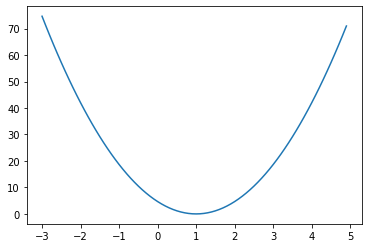

In [49]:
plt.plot(W_history, cost_history)